In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier

from utilities import visualize_classifier

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, Y = data[:, :-1], data[:, -1]

In [11]:
#클래스 나눔
class_0 = np.array(X[Y==0])
class_1 = np.array(X[Y==1])

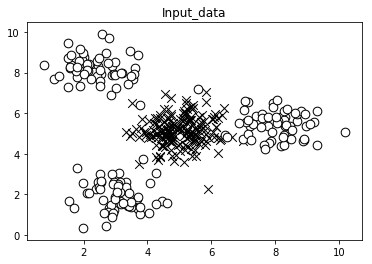

In [12]:
#data visualization
plt.figure()
plt.scatter(class_0[:,0], class_0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:,0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
plt.title("Input_data")
plt.show()

In [13]:
#split into training and test set
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.25, random_state=5)

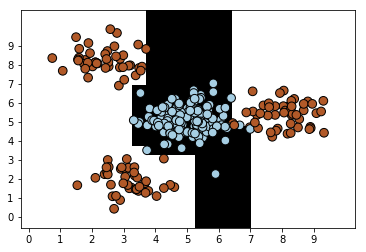

In [15]:
#Decision Tree
params = {'random_state':0, 'max_depth':4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, Y_train)
visualize_classifier(classifier, X_train, Y_train)

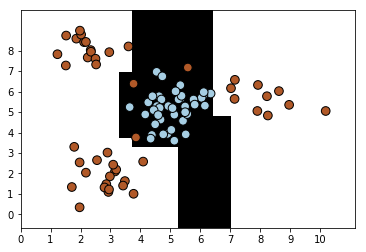

In [16]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, Y_test)

In [17]:
#evaluating classifier
class_names = ['Class-0', 'Class-1']
print("n"+"#"*40)
print("\nClassifier performance on training dataset\n")
print(classification_report(Y_train, classifier.predict(X_train), target_names=class_names))
print("#"*40 + "\n")
print("#"*40)
print("\nClassifier performance on test dataset\n")
print(classification_report(Y_test, y_test_pred, target_names=class_names))
print("#"*40 + "\n")
plt.show()

n########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.99      1.00      1.00       137
    Class-1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.93      1.00      0.97        43
    Class-1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90

########################################

